In [34]:
import os
from google.colab import files
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [2]:
!ls

sample_data  test.csv  train.csv


In [ ]:
for dirpath, _, filenames in os.walk('/content/'):

  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))


In [12]:
type(uploaded['test (1).csv'])

bytes

In [13]:
uploaded_str = uploaded['test (1).csv'].decode()
print(type(uploaded_str))

<class 'str'>


In [14]:
print(uploaded_str[:35])

PassengerId,Pclass,Name,Sex,Age,Sib


In [15]:
uploaded_list = uploaded_str.split('\r\n')
type(uploaded_list)

list

In [16]:
for i, line in enumerate(uploaded_list):

  # начнем выводить записи
  print(line)

  # когда дойдем до четвертой строки
  if i == 3:

    # прервемся
    break


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


In [3]:
f1 = open('/content/train.csv', 'r')

In [4]:
print(f1.read(142))

# в конце файл необходимо закрыть
f1.close()


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S



In [5]:
f2 = open('/content/train.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):

    # выведем строки без служебных символов по краям
    print(line.strip())

    # дойдя до четвертой строки, прервемся
    if i == 3:
      break

# не забудем закрыть файл
f2.close()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S


In [6]:
train = pd.read_csv('/content/train.csv')
train.head(3)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='count'>

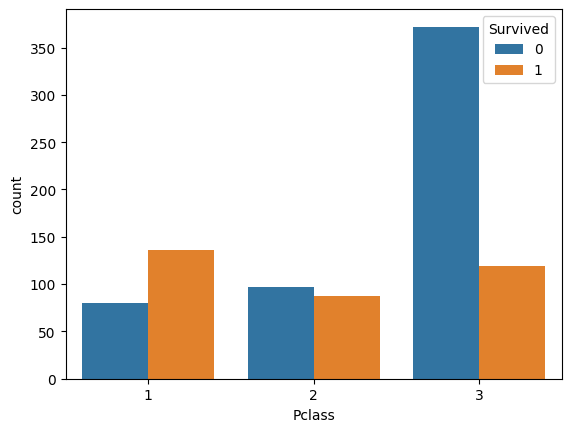

In [7]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

<Axes: xlabel='Sex', ylabel='count'>

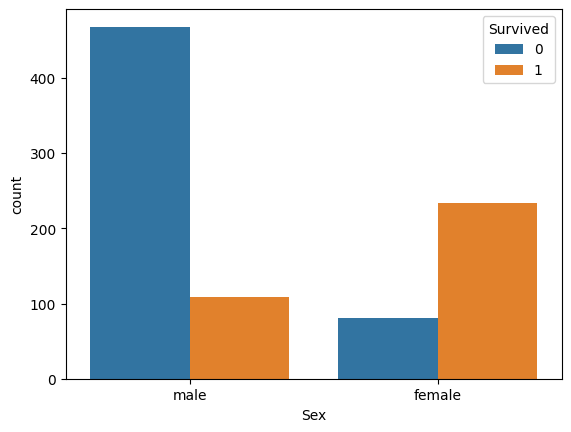

In [28]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

In [8]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns = 'Cabin', axis = 1, inplace = True)


In [10]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [11]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)


In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [15]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(3)


,male
0,1
1,0
2,0


In [ ]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)


In [16]:
train = pd.concat([train, pclass, sex, embarked], axis = 1)

In [18]:
# применим функцию drop() к соответствующим столбцам
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(3)


,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,1,0,0,1


In [20]:
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Age', 'Fare']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])


StandardScaler()

In [21]:
# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)


,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,0,1,1,0,1,0,1,1,0,1
1,1,0.643971,1,0,0.788947,0,0,0,0,0,0,0,0,0,0
2,1,-0.281878,0,0,-0.486650,0,1,0,0,1,0,1,0,0,1


In [22]:
train.columns

Index(['Survived',      'Age',    'SibSp',    'Parch',     'Fare',          2,
                3,     'male',        'Q',        'S',          2,          3,
           'male',        'Q',        'S'],
      dtype='object')

In [23]:
train.columns = train.columns.map(str)

In [24]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Survived', axis = 1)

# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Survived']


In [25]:
X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,0,1,1,0,1,0,1,1,0,1
1,0.643971,1,0,0.788947,0,0,0,0,0,0,0,0,0,0
2,-0.281878,0,0,-0.486650,0,1,0,0,1,0,1,0,0,1


In [27]:
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
LogisticRegression()

LogisticRegression()

In [29]:
y_pred_train = model.predict(X_train)

In [31]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df


,0,1
0,477,72
1,102,238


In [32]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])
conf_matrix_labels


,Прогноз погиб,Прогноз выжил
Факт погиб,477,72
Факт выжил,102,238


In [33]:
# рассчитаем метрику accuracy вручную
round((477 + 238)/(477 + 238 + 72 + 102), 3)


0.804

In [35]:
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)


0.804

In [37]:
test = pd.read_csv('/content/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
X_test = test
X_test['Age'].fillna(test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(test['Fare'].mean(), inplace = True)
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['Sex'], drop_first = True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first = True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first = True)

In [39]:
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis = 1)

# и удалим данные, которые теперь не нужны
X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)

# посмотрим на результат
X_test.head(3)



,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0


In [40]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)


,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,0,1,1,1,0
1,1.338358,1,0,-0.505273,0,1,0,0,1
2,2.495670,0,0,-0.451165,1,0,1,1,0


In [41]:
X_test.columns = X_test.columns.map(str)

In [47]:
X_test = X_test[X_train.columns]

In [48]:
y_pred_test = model.predict(X_test)

In [49]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [50]:
url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

# просто поместим его url в функцию read_csv()
example = pd.read_csv(url)
example.head(3)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [51]:
ids = test['PassengerId']


In [52]:
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})

# посмотрим, что получилось
result.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [53]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)
# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')


Файл успешно сохранился в сессионное хранилище!


In [54]:
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>